In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import metrics 
from collections import Counter
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours

from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn import metrics
import time


In [2]:
data = df= pd.read_csv('encoded.csv')
X ,y = df.drop('isFraud', axis=1),df.isFraud
y = (y==1).astype(int)

In [3]:
from sklearn.model_selection import train_test_split
_, X_keep, _, y_keep = train_test_split(X, y, test_size=0.2)

In [4]:
def ordinary(X_train, X_test, y_train, y_test, model):
    DTC = model.fit(X_train, y_train)
    predictions = DTC.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support =metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    
    
    
    fpr, tpr, thresholds =roc_curve(y_test, predictions, pos_label=1)
    
    
    auc = metrics.auc(fpr, tpr)
    
    #y_pred_test_prob = grid.predict_proba(X_test)
    
   
    
    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)
    

In [5]:

def class_weight(X_train, X_test, y_train, y_test, model):
    
    model.set_params(class_weight='balanced')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)

  
    
    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)
    

In [6]:
def Oversampling(X_train, X_test, y_train, y_test, model, sampler):
    print(f'Before resampling: {sorted(Counter(y_train).items())}')
    X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
    print(f'After resampling: {sorted(Counter(y_resampled).items())}')
        
    model.fit(X_resampled, y_resampled)
    predictions = model.predict(X_test)
        
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)
    

In [7]:
def Undersampling(X_train, X_test, y_train, y_test, model,sampler):
    if sampler == 'NearMiss': sampler+=str(sampler.version)
    print(f'Technique: {sampler}')
    print(f'Before resampling: {sorted(Counter(y_train).items())}')
    X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
    print(f'After resampling: {sorted(Counter(y_resampled).items())}')

    model.fit(X_resampled, y_resampled)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    
    print(fpr, tpr)
    
    auc = metrics.auc(fpr, tpr)
    

   
    print("F1: ", metrics.f1_score(y_test, predictions))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, predictions))
    print("Brier: ", metrics.brier_score_loss(y_test, predictions))
    #print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, predictions))
    conf_matrix = metrics.confusion_matrix(y_test, predictions)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, alpha=0.3,cmap=plt.cm.gray_r)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24,color ='k')
            plt.title('Confusion Matrix ', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    plt.show()
    

    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    
    plt.plot([0, 0, 1], [0, 1, 1], lw=2,linestyle=':',color='black',label='Perfect Performance')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic', size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_keep, y_keep, stratify=y_keep, test_size=0.2)

In [9]:
techniques = [RandomOverSampler(),
              SMOTE(),
              ADASYN(),
              RandomUnderSampler(),
              TomekLinks(),
              EditedNearestNeighbours()]

In [10]:
model = RandomForestClassifier()

## RandomForestClassifier

C:\Users\raslan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F1:  0.8319185059422751
Cohen Kappa:  0.8317284386575204
Brier:  0.0003889903931160488
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254165
           1       0.98      0.72      0.83       340

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.99      0.86      0.92    254505
weighted avg       1.00      1.00      1.00    254505



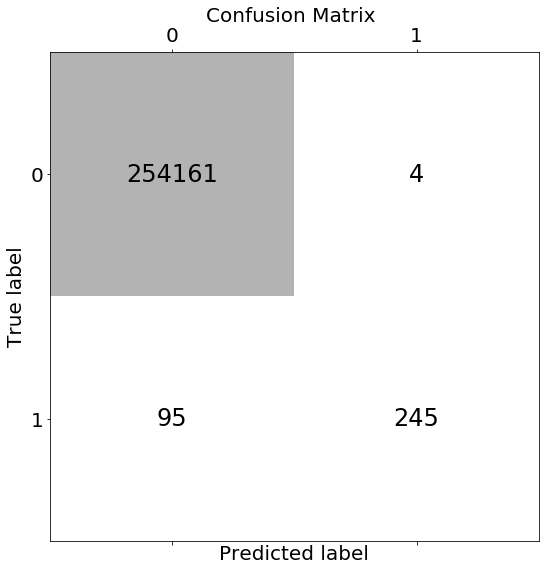

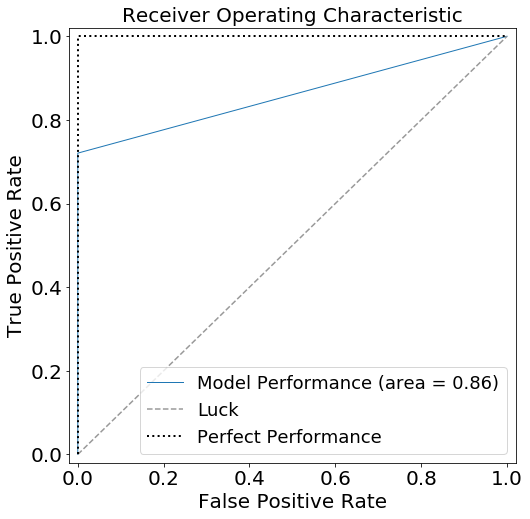

In [11]:
ordinary(X_train, X_test, y_train, y_test, model)


F1:  0.8205128205128206
Cohen Kappa:  0.8203117527320432
Brier:  0.0004125655684564154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254165
           1       0.98      0.71      0.82       340

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.99      0.85      0.91    254505
weighted avg       1.00      1.00      1.00    254505



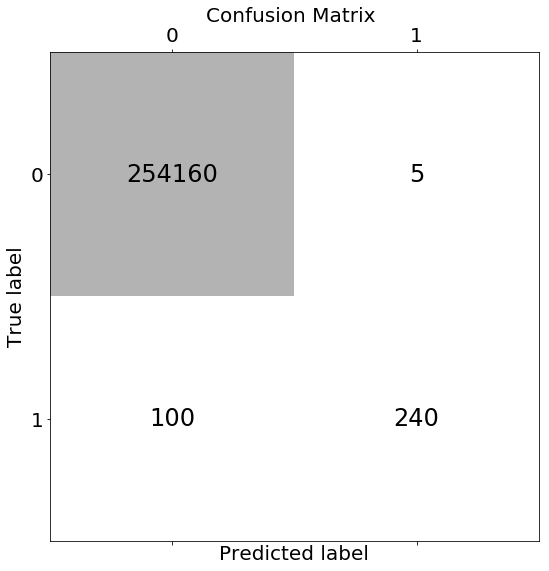

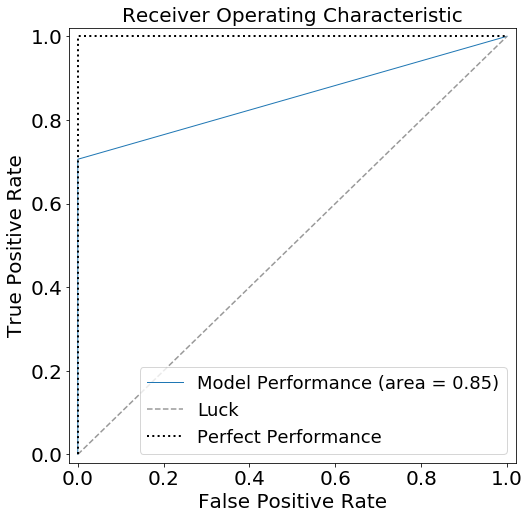

In [12]:
class_weight(X_train, X_test, y_train, y_test, model)


Before resampling: [(0, 1016660), (1, 1359)]
After resampling: [(0, 1016660), (1, 1016660)]
F1:  0.8297520661157025
Cohen Kappa:  0.8295525888059341
Brier:  0.0004047071766762932
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254165
           1       0.95      0.74      0.83       340

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.97      0.87      0.91    254505
weighted avg       1.00      1.00      1.00    254505



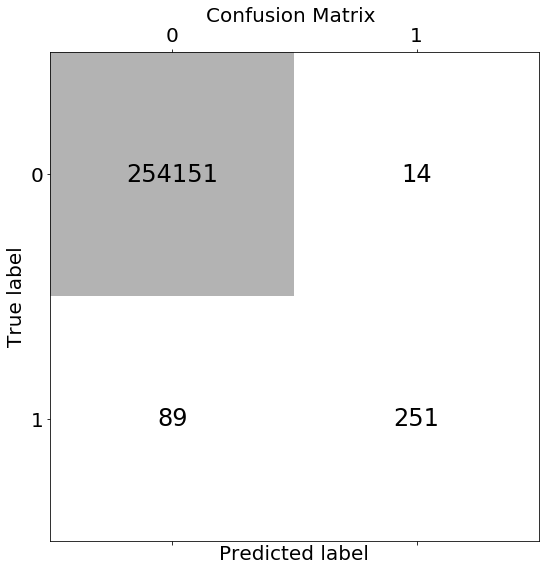

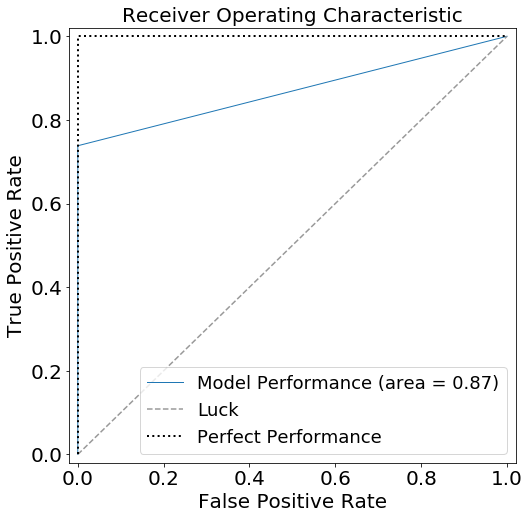

In [14]:
Oversampling(X_train, X_test, y_train, y_test, model, RandomOverSampler()) 
#RandomOverSampler

Before resampling: [(0, 1016660), (1, 1359)]
After resampling: [(0, 1016660), (1, 1016660)]
F1:  0.7424242424242424
Cohen Kappa:  0.7420308793673476
Brier:  0.0008015559615724641
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254165
           1       0.65      0.86      0.74       340

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.83      0.93      0.87    254505
weighted avg       1.00      1.00      1.00    254505



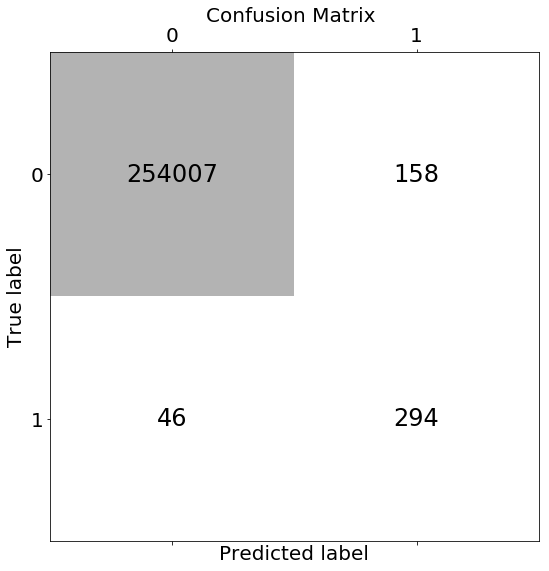

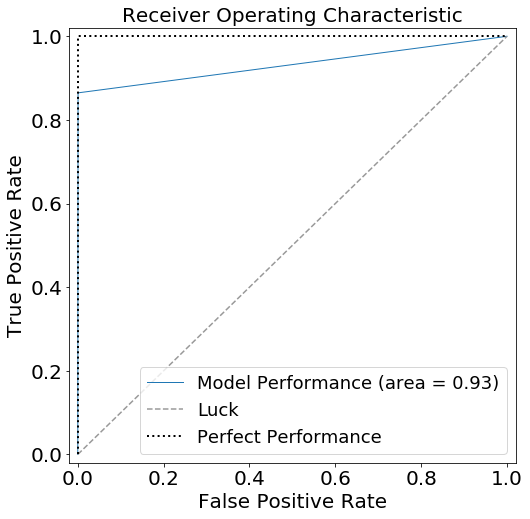

In [15]:
Oversampling(X_train, X_test, y_train, y_test, model,SMOTE())
#SMOTE()

Before resampling: [(0, 1016660), (1, 1359)]
After resampling: [(0, 1016660), (1, 1016476)]
F1:  0.7333333333333333
Cohen Kappa:  0.7329192688412665
Brier:  0.0008487063122531974
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254165
           1       0.63      0.87      0.73       340

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.82      0.94      0.87    254505
weighted avg       1.00      1.00      1.00    254505



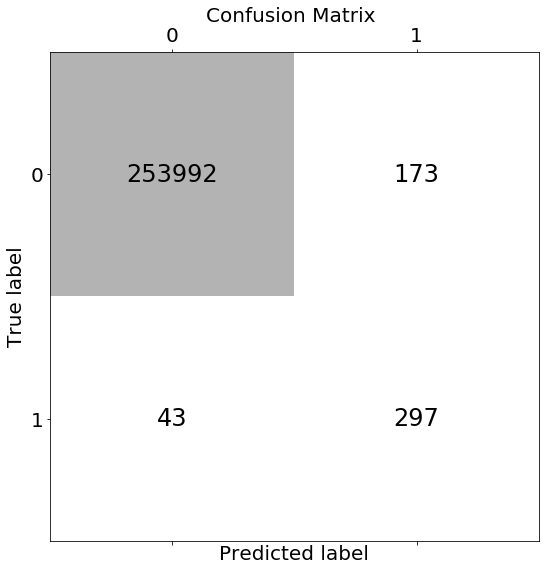

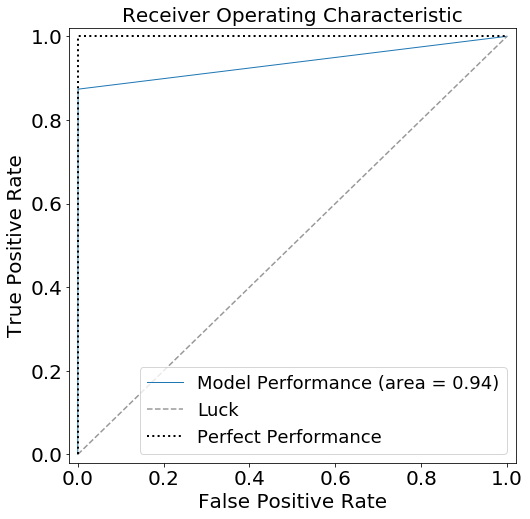

In [16]:
Oversampling(X_train, X_test, y_train, y_test, model,ADASYN())
#ADASYN()

Technique: RandomUnderSampler(random_state=None, ratio=None, replacement=False,
          return_indices=False, sampling_strategy='auto')
Before resampling: [(0, 1016660), (1, 1359)]
After resampling: [(0, 1359), (1, 1359)]
[0.         0.02486967 1.        ] [0.         0.98529412 1.        ]
F1:  0.0957690108633505
Cohen Kappa:  0.09346459489178682
Brier:  0.02485609320052651
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    254165
           1       0.05      0.99      0.10       340

   micro avg       0.98      0.98      0.98    254505
   macro avg       0.53      0.98      0.54    254505
weighted avg       1.00      0.98      0.99    254505



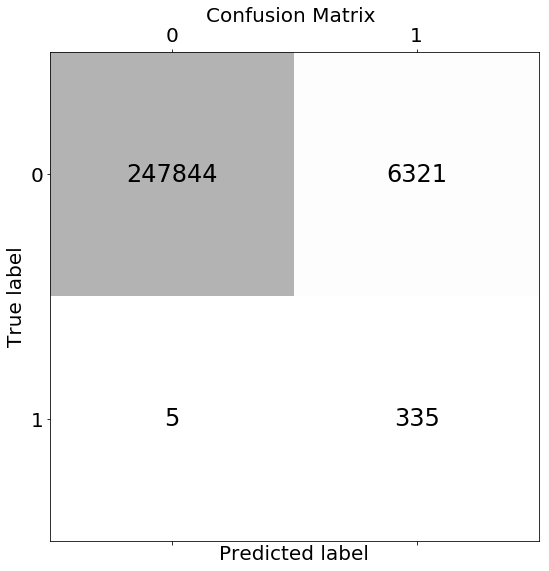

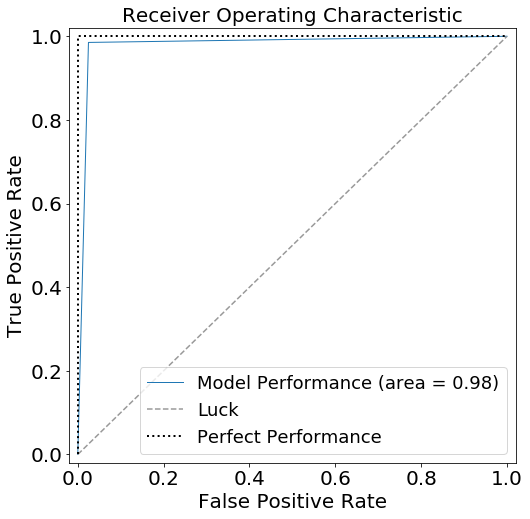

In [17]:
Undersampling(X_train, X_test, y_train, y_test, model,RandomUnderSampler())
#RandomUnderSampler()

Technique: TomekLinks(n_jobs=1, random_state=None, ratio=None, return_indices=False,
      sampling_strategy='auto')
Before resampling: [(0, 1016660), (1, 1359)]
After resampling: [(0, 1016433), (1, 1359)]
[0.00000000e+00 2.36067122e-05 1.00000000e+00] [0.         0.68823529 1.        ]
F1:  0.806896551724138
Cohen Kappa:  0.8066828213282224
Brier:  0.0004400699396868431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254165
           1       0.97      0.69      0.81       340

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.99      0.84      0.90    254505
weighted avg       1.00      1.00      1.00    254505



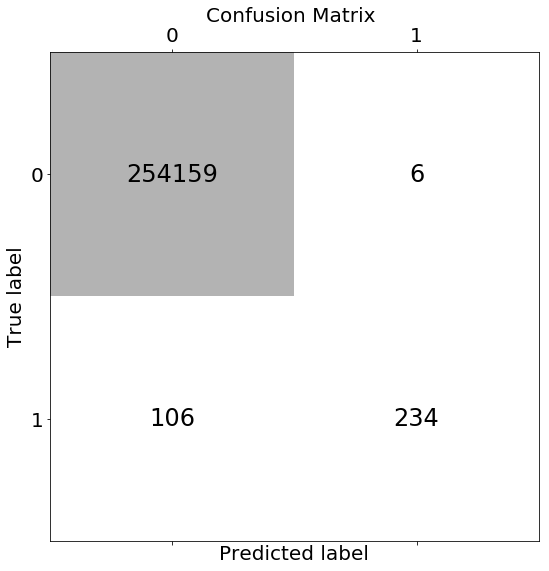

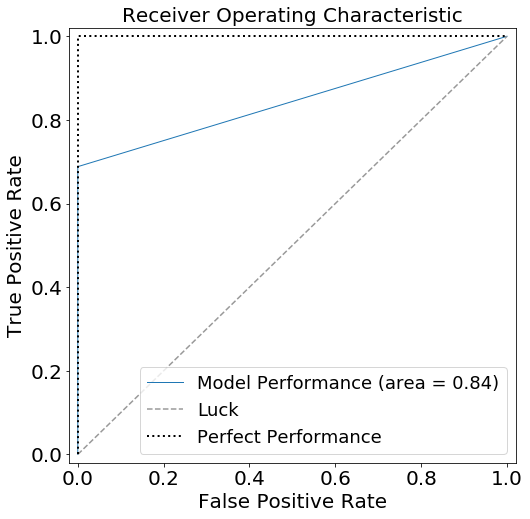

In [18]:
Undersampling(X_train, X_test, y_train, y_test, model,TomekLinks())
#TomekLinks()

Technique: EditedNearestNeighbours(kind_sel='all', n_jobs=1, n_neighbors=3,
            random_state=None, ratio=None, return_indices=False,
            sampling_strategy='auto')
Before resampling: [(0, 1016660), (1, 1359)]
After resampling: [(0, 1015557), (1, 1359)]
[0.00000000e+00 1.96722601e-05 1.00000000e+00] [0.         0.70294118 1.        ]
F1:  0.8184931506849314
Cohen Kappa:  0.8182903041120804
Brier:  0.0004164947643464765
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    254165
           1       0.98      0.70      0.82       340

   micro avg       1.00      1.00      1.00    254505
   macro avg       0.99      0.85      0.91    254505
weighted avg       1.00      1.00      1.00    254505



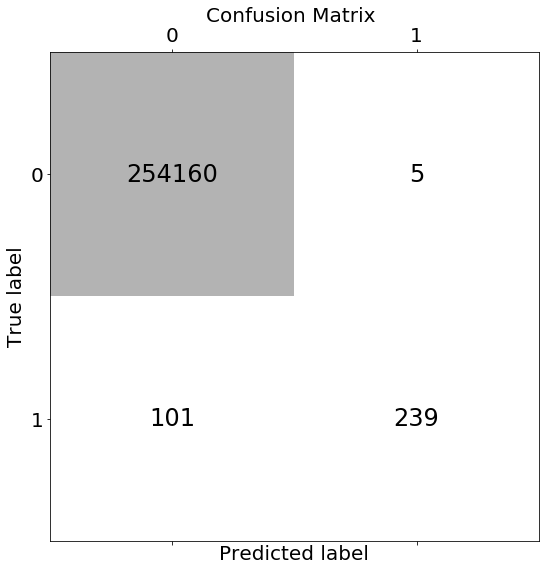

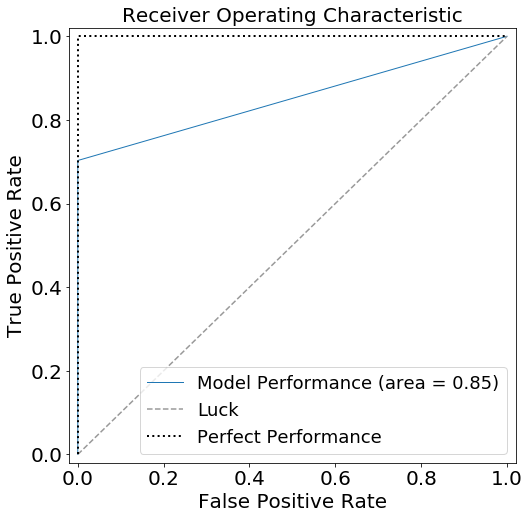

In [19]:
Undersampling(X_train, X_test, y_train, y_test, model,EditedNearestNeighbours())
#EditedNearestNeighbours()

In [ ]:
#Nearmiss
#Undersampling(X_train, X_test, y_train, y_test, model,Nearmiss())

In [22]:
#Undersampling(X_train, X_test, y_train, y_test, model,NearMiss(version=2))
#NearMiss(version=2)